# Exploring Dandiset 000690: Visual Responses and Behavior in Mouse Visual Cortex

> **Note**: This notebook was generated with AI assistance. Users should carefully validate all code and interpretations.

## Overview
This notebook introduces [Dandiset 000690](https://dandiarchive.org/dandiset/000690/0.250326.0015), which contains extracellular recordings from mouse visual cortex during presentation of various visual stimuli, along with behavioral measurements.

### What this notebook covers:
- Loading and exploring NWB file structure
- Accessing spike data, stimulus information, and behavioral signals
- Visualizing neural activity and behavioral measurements
- Aligning neural data with stimulus presentations

### Required Packages
```python
dandi
h5py
numpy
pandas
matplotlib
pynwb
remfile
```

## Accessing the Data

In [1]:
# Import required packages
from dandi.dandiapi import DandiAPIClient
import remfile
import h5py
import pynwb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize DANDI client
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# List available NWB files
nwb_assets = list(dandiset.get_assets_by_glob("*.nwb"))

# Separate image (unit/spike) and other (LFP) files
image_nwb = [a for a in nwb_assets if a.path.endswith('_image.nwb')]
other_nwb = [a for a in nwb_assets if not a.path.endswith('_image.nwb')]

# Display file counts and examples
print("NWB files containing spike data (*_image.nwb):")
for asset in image_nwb[:3]:
    size_mb = asset.size / 1024**2
    print(f"- {asset.path} ({size_mb:.1f} MB)")
print(f"Total: {len(image_nwb)} files")

print("\nOther NWB files (containing LFP):")
for asset in other_nwb[:3]:
    size_mb = asset.size / 1024**2
    print(f"- {asset.path} ({size_mb:.1f} MB)")
print(f"Total: {len(other_nwb)} files")

NWB files containing spike data (*_image.nwb):
- sub-695762/sub-695762_ses-1317448357_image.nwb (7552.8 MB)
- sub-692072/sub-692072_ses-1298465622_image.nwb (6470.4 MB)
- sub-695435/sub-695435_ses-1309235849_image.nwb (6325.7 MB)
Total: 25 files

Other NWB files (containing LFP):
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (1606.2 MB)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (1700.1 MB)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (1569.8 MB)
Total: 131 files


## Loading and Exploring an Example Session

In [2]:
# Load an example session using remote streaming
asset = next(dandiset.get_assets_by_glob("sub-695762/sub-695762_ses-1317448357_image.nwb"))
remote_file = remfile.File(asset.download_url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Extract and display basic session information
session_info = {
    'identifier': nwb.identifier,
    'subject_id': nwb.subject.subject_id,
    'age_days': nwb.subject.age_in_days,
    'sex': nwb.subject.sex,
    'species': nwb.subject.species,
    'num_units': len(nwb.units.id[:]),
    'num_electrodes': len(nwb.electrodes.id[:])
}

print("Session Information:")
for key, value in session_info.items():
    print(f"  {key}: {value}")

Session Information:
  identifier: 1317448357
  subject_id: 695762
  age_days: 141.0
  sex: F
  species: Mus musculus
  num_units: 1918
  num_electrodes: 1152


## Neural Data: Spike Analysis

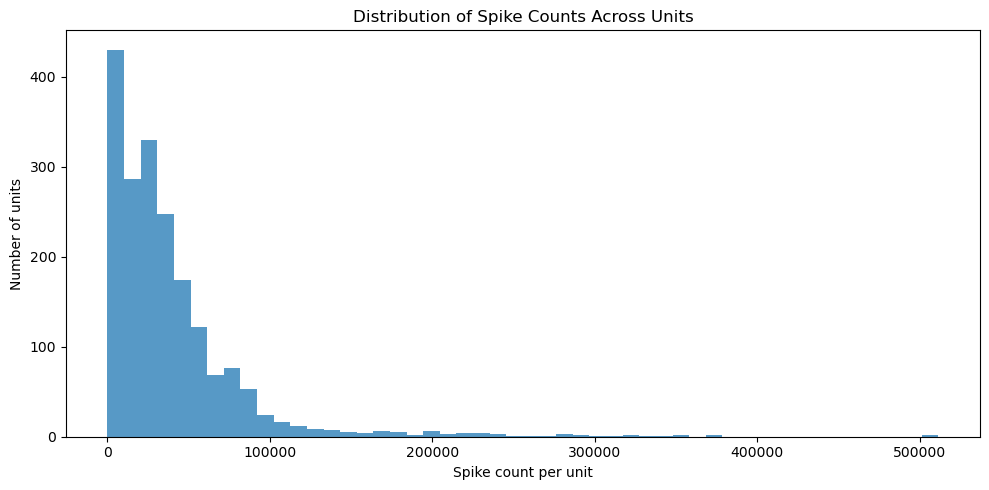

In [3]:
# Get spike counts for all units
unit_ids = nwb.units.id[:]
spike_counts = np.array([len(nwb.units.spike_times_index[i]) for i in range(len(unit_ids))])

# Plot distribution of spike counts
plt.figure(figsize=(10, 5))
plt.hist(spike_counts, bins=50, color='tab:blue', alpha=0.75)
plt.xlabel('Spike count per unit')
plt.ylabel('Number of units')
plt.title('Distribution of Spike Counts Across Units')
plt.tight_layout()
plt.show()

## Behavioral Data
The dataset includes both running wheel measurements and eye tracking data.

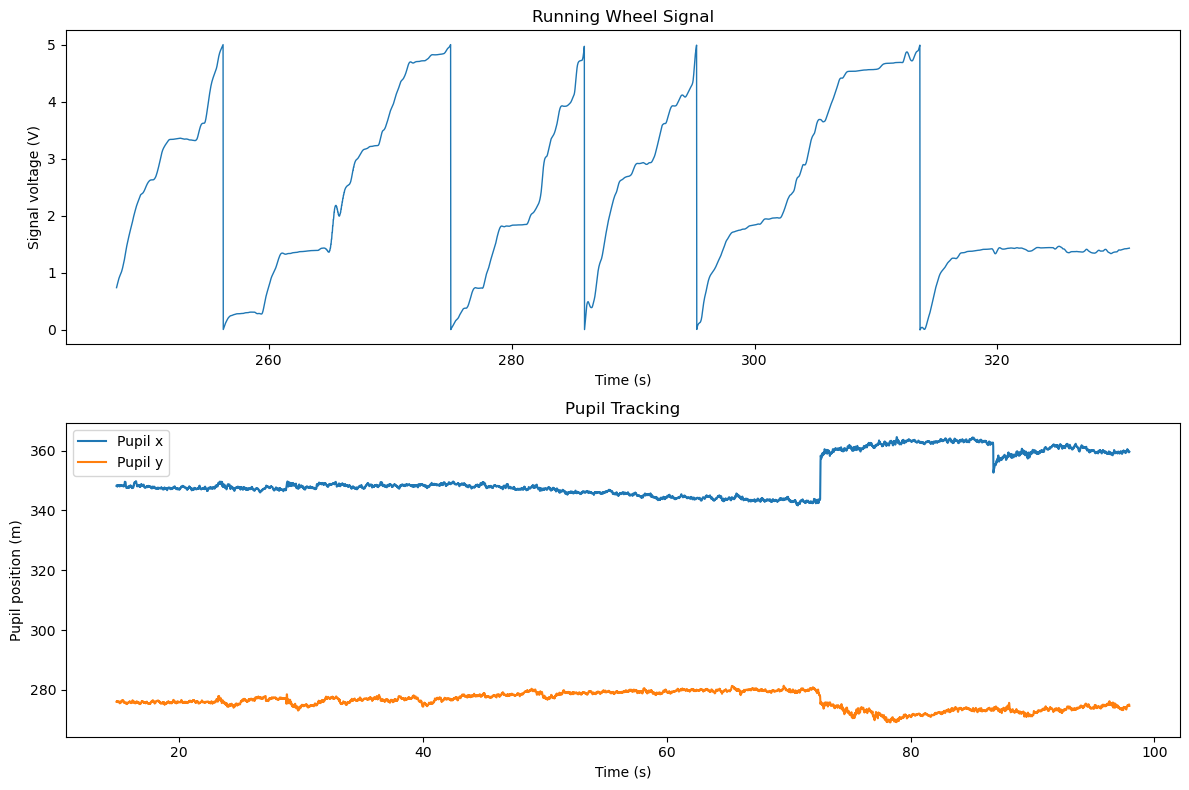

In [4]:
# Plot running wheel and eye tracking data (first 5000 samples)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Running wheel
rw_signal = nwb.acquisition['running_wheel_signal_voltage']
rw_data = rw_signal.data[:5000]
rw_ts = rw_signal.timestamps[:5000]
ax1.plot(rw_ts, rw_data, lw=1)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Signal voltage (V)')
ax1.set_title('Running Wheel Signal')

# Eye tracking
pupil_tracking = nwb.acquisition['EyeTracking'].pupil_tracking
eyepos = pupil_tracking.data[:5000]
eyets = pupil_tracking.timestamps[:5000]
ax2.plot(eyets, eyepos[:, 0], label='Pupil x')
ax2.plot(eyets, eyepos[:, 1], label='Pupil y')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Pupil position (m)')
ax2.set_title('Pupil Tracking')
ax2.legend()

plt.tight_layout()
plt.show()

## Stimulus Information
The dataset contains various visual stimuli and their presentation times.

In [5]:
# Show available stimulus templates
print("Available stimulus templates:")
for name in nwb.stimulus_template.keys():
    template = nwb.stimulus_template[name]
    print(f"- {name}")
    print(f"  Shape: {template.data.shape}")
    print(f"  Rate: {template.rate} Hz")
    print()

Available stimulus templates:
- DOT_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
  Shape: (960, 540, 240)
  Rate: 60.0 Hz

- Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
  Shape: (960, 540, 240, 3)
  Rate: 60.0 Hz

- Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
  Shape: (960, 540, 240)
  Rate: 60.0 Hz

- Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
  Shape: (960, 540, 240)
  Rate: 60.0 Hz

- SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
  Shape: (960, 540, 240)
  Rate: 60.0 Hz

- SAC_Wd15_Vel2_Bndry1_Cntst0_scrambled_presentations
  Shape: (960, 540, 240)
  Rate: 60.0 Hz

- SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations
  Shape: (960, 540, 240)
  Rate: 60.0 Hz

- SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations
  Shape: (960, 540, 142)
  Rate: 60.0 Hz

- SAC_Wd15_Vel2_Bndry3_Cntst0_loop_presentations
  Shape: (960, 540, 372)
  Rate: 60.0 Hz

- SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations
  Shape: (960, 540, 960)
  Rate: 60.0 Hz

- SAC_Wd45_Vel2_Bndry1_Cntst0_loop_present

## Example: Aligning Spikes to Stimulus

In [6]:
# Get spike times for an example unit
example_unit_id = unit_ids[0]
spike_times = nwb.units.spike_times_index[0]

# Get timing for first presentation of first stimulus
example_interval = list(nwb.intervals.keys())[0]
interval_table = nwb.intervals[example_interval]
interval_df = interval_table.to_dataframe().head(1)

stim_start = interval_df.iloc[0]["start_time"]
stim_stop = interval_df.iloc[0]["stop_time"]

# Find spikes during this interval
spikes_in_interval = spike_times[(spike_times >= stim_start) & (spike_times < stim_stop)]

print(f"Example stimulus-aligned analysis:")
print(f"Stimulus interval: {stim_start:.3f} - {stim_stop:.3f} s")
print(f"Number of spikes in interval: {len(spikes_in_interval)}")

Example stimulus-aligned analysis:
Stimulus interval: 985.157 - 985.174 s
Number of spikes in interval: 0


## Next Steps
With this foundation, researchers can:
- Analyze neural responses to specific visual stimuli
- Correlate neural activity with running or eye position
- Compare responses across different stimulus conditions
- Study population-level activity patterns
- Investigate behavioral state effects on visual processing